In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mserr
from sklearn.decomposition import PCA

In [2]:
path = "C:\\Users\\Nikhil\\Desktop\\Msit\\DataScience_2019501112\\CodeCamp-1\\" 
train = path + "train.csv"
test = path + "test.csv"

In [3]:
trainx_df = pd.read_csv(train, index_col = 'Id')
print(trainx_df.shape)

(1460, 80)


In [4]:
trainy_df = trainx_df['SalePrice']
print(trainy_df.shape)

(1460,)


In [5]:
trainx_df.drop('SalePrice', axis = 1, inplace = True)
testx_df = pd.read_csv(test, index_col = 'Id')
print(trainx_df.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64


In [6]:
sample_size = len(trainx_df)
columns_with_null_values = []
columns_with_null_values = [[col, float(trainx_df[col].isnull().sum())/float(sample_size)] for col in trainx_df.columns if trainx_df[col].isnull().sum()]
print(columns_with_null_values)

[['LotFrontage', 0.1773972602739726], ['Alley', 0.9376712328767123], ['MasVnrType', 0.005479452054794521], ['MasVnrArea', 0.005479452054794521], ['BsmtQual', 0.025342465753424658], ['BsmtCond', 0.025342465753424658], ['BsmtExposure', 0.026027397260273973], ['BsmtFinType1', 0.025342465753424658], ['BsmtFinType2', 0.026027397260273973], ['Electrical', 0.0006849315068493151], ['FireplaceQu', 0.4726027397260274], ['GarageType', 0.05547945205479452], ['GarageYrBlt', 0.05547945205479452], ['GarageFinish', 0.05547945205479452], ['GarageQual', 0.05547945205479452], ['GarageCond', 0.05547945205479452], ['PoolQC', 0.9952054794520548], ['Fence', 0.8075342465753425], ['MiscFeature', 0.963013698630137]]


In [7]:
columns_to_drop = [x for (x,y) in columns_with_null_values if y>.3]
print(columns_to_drop)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
trainx_df.drop(columns_to_drop, axis = 1, inplace = True)
testx_df.drop(columns_to_drop, axis = 1, inplace = True)
# print(len(train_df.columns))
# print(len(train_df))
# remove samples
# train_df.dropna(axis = 0, inplace = True)
# print(len(train_df))

In [9]:
categorical_columns = [col for col in trainx_df.columns if
                      trainx_df[col].dtype == object]
# categorical_columns.append('MSSubClass')
print(categorical_columns)
ordinal_columns = [col for col in trainx_df.columns 
                  if col not in categorical_columns]
# null_value_categorical_variables = [col for col in categorical_columns
#                                    if trainx_df[col].isnull().sum()]
# print(null_value_categorical_variables)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [10]:
dummy_row = list()
for col in trainx_df.columns:
    if col in categorical_columns:
        dummy_row.append("dummy")
    else:
        dummy_row.append("")
print(dummy_row)

['', 'dummy', '', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', 'dummy', '', '', '', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', '', '', '', '', '', '', '', 'dummy', '', 'dummy', '', 'dummy', '', 'dummy', '', '', 'dummy', 'dummy', 'dummy', '', '', '', '', '', '', '', '', '', 'dummy', 'dummy']


In [11]:
new_row = pd.DataFrame([dummy_row], columns = trainx_df.columns)
trainx_df = pd.concat([trainx_df, new_row], axis = 0, ignore_index = True)
testx_df = pd.concat([testx_df], axis = 0, ignore_index = True)
# trainx_df.to_csv["dummy.csv"]
for col in categorical_columns:
    trainx_df[col].fillna(value = "dummy", inplace = True)
    testx_df[col].fillna(value = "dummy", inplace = True)
    

In [12]:
enc = OneHotEncoder(drop='first',sparse=False)
enc.fit(trainx_df[categorical_columns])
print(enc.get_feature_names(categorical_columns))

['MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL' 'MSZoning_RM' 'MSZoning_dummy'
 'Street_Pave' 'Street_dummy' 'LotShape_IR2' 'LotShape_IR3' 'LotShape_Reg'
 'LotShape_dummy' 'LandContour_HLS' 'LandContour_Low' 'LandContour_Lvl'
 'LandContour_dummy' 'Utilities_NoSeWa' 'Utilities_dummy'
 'LotConfig_CulDSac' 'LotConfig_FR2' 'LotConfig_FR3' 'LotConfig_Inside'
 'LotConfig_dummy' 'LandSlope_Mod' 'LandSlope_Sev' 'LandSlope_dummy'
 'Neighborhood_Blueste' 'Neighborhood_BrDale' 'Neighborhood_BrkSide'
 'Neighborhood_ClearCr' 'Neighborhood_CollgCr' 'Neighborhood_Crawfor'
 'Neighborhood_Edwards' 'Neighborhood_Gilbert' 'Neighborhood_IDOTRR'
 'Neighborhood_MeadowV' 'Neighborhood_Mitchel' 'Neighborhood_NAmes'
 'Neighborhood_NPkVill' 'Neighborhood_NWAmes' 'Neighborhood_NoRidge'
 'Neighborhood_NridgHt' 'Neighborhood_OldTown' 'Neighborhood_SWISU'
 'Neighborhood_Sawyer' 'Neighborhood_SawyerW' 'Neighborhood_Somerst'
 'Neighborhood_StoneBr' 'Neighborhood_Timber' 'Neighborhood_Veenker'
 'Neighborhood_dummy' 'Condit

In [13]:
trainx_enc = pd.DataFrame(enc.transform(trainx_df[categorical_columns]))
testx_enc = pd.DataFrame(enc.transform(testx_df[categorical_columns]))
trainx_enc.columns = enc.get_feature_names(categorical_columns)
testx_enc.columns = enc.get_feature_names(categorical_columns)
trainx_df = pd.concat([trainx_df[ordinal_columns],trainx_enc],axis = 1,ignore_index = True)
testx_df = pd.concat([testx_df[ordinal_columns],testx_enc],axis = 1,ignore_index = True)
trainx_df.drop(trainx_df.tail(1).index,inplace = True)

In [14]:
imputer = KNNImputer(n_neighbors=5)
imputer.fit(trainx_df)
trainx_df_filled = imputer.transform(trainx_df)
trainx_df_filled = pd.DataFrame(trainx_df_filled,columns=trainx_df.columns)
testx_df_filled=imputer.transform(testx_df)
testx_df_filled = pd.DataFrame(testx_df_filled,columns=testx_df.columns)
testx_df_filled.reset_index(drop=True,inplace=True)
# print(trainx_df_filled.isnull().sum())
# return trainx_df_filled, testx_df_filled

In [15]:
scaler = preprocessing.StandardScaler().fit(trainx_df_filled)
trainx_df_filled = scaler.transform(trainx_df_filled)
testx_df_filled = scaler.transform(testx_df_filled)
X_train, X_test, y_train, y_test = train_test_split(trainx_df_filled, trainy_df.values.ravel(), test_size = 0.3, random_state = 42)

In [16]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))
score_train=[]
score_test=[]
mse_train=[]
mse_test=[]
alpha=[]
for sigma in np.linspace(10.05, 71.05, 10):
    alpha.append(sigma)
    reg = Ridge(alpha = sigma, tol = 0.0001)
    reg = reg.fit(X_train, y_train)
    pred = pd.DataFrame(reg.predict(testx_df_filled))
    score_train.append(round(reg.score(X_train, y_train),10))
    score_test.append(round(reg.score(X_test, y_test),10))
    mse_train.append(round(mserr(y_train,reg.predict(X_train)),4))
    mse_test.append(round(mserr(y_test,reg.predict(X_test)),4))
    testpred = pd.DataFrame(reg.predict(testx_df_filled))
    testpred.to_csv("test_pred.csv")
print(alpha, '\n', score_train, '\n', score_test)

0.9342215145254366
-2.4370192914746017e+23
[10.05, 16.82777777777778, 23.605555555555554, 30.383333333333333, 37.16111111111111, 43.93888888888888, 50.71666666666667, 57.49444444444444, 64.27222222222223, 71.05] 
 [0.9264174681, 0.9224075179, 0.9194113976, 0.9170585156, 0.9151276526, 0.9134873375, 0.9120560542, 0.9107808801, 0.9096259903, 0.9085662348] 
 [0.8494501508, 0.8649347909, 0.8715948605, 0.8749369745, 0.8767717229, 0.8778315875, 0.8784565858, 0.8788209324, 0.879020794, 0.8791124389]


In [17]:
print(alpha, '\n', mse_train, '\n', mse_test)

[10.05, 16.82777777777778, 23.605555555555554, 30.383333333333333, 37.16111111111111, 43.93888888888888, 50.71666666666667, 57.49444444444444, 64.27222222222223, 71.05] 
 [442862021.1631, 466996209.3237, 485028585.4461, 499189583.1753, 510810627.7889, 520682988.1152, 529297274.8715, 536972006.3345, 543922797.6146, 550301015.9913] 
 [1050550963.6546, 942497693.2463, 896023102.5244, 872701517.8444, 859898471.5653, 852502636.9392, 848141340.3586, 845598895.7565, 844204242.5746, 843564736.0481]


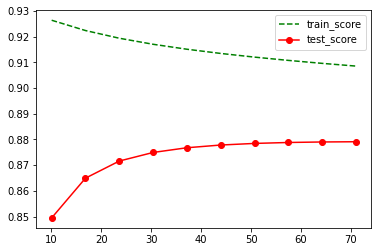

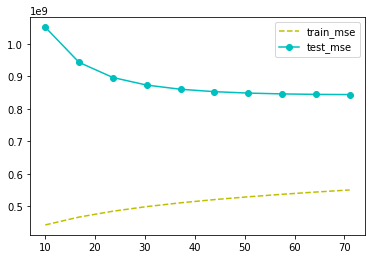

In [18]:
plt.figure(1)
plt.plot(alpha, score_train, 'g--', label = "train_score")
plt.plot(alpha, score_test, 'r-o', label = "test_score")
plt.xlabel = 'Alpha'
plt.legend()
plt.figure(2)
plt.plot(alpha, mse_train, 'y--',label = "train_mse")
plt.plot(alpha, mse_test, 'c-o',label = "test_mse")
plt.xlabel = 'Alpha'
plt.legend()
plt.show()